### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Importing Data

In [2]:
data_purchase = pd.read_csv("purchase data.csv")

In [3]:
data_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [4]:
data_purchase['ID'].value_counts()

200000187    358
200000041    353
200000247    347
200000097    182
200000393    179
            ... 
200000061     76
200000415     74
200000367     74
200000267     74
200000113     72
Name: ID, Length: 500, dtype: int64

In [5]:
data_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

### Import Segmenation Model

In [6]:
scaler = pickle.load(open("scaler.pickle","rb"))

In [7]:
pca = pickle.load(open("pca.pickle","rb"))

In [8]:
kmeans_pca = pickle.load(open("kmeans_pca.pickle","rb"))

### Standardization

In [9]:
features = data_purchase[["Sex","Marital status","Age","Education","Income","Occupation","Settlement size"]].copy()
data_purchase_seg_std = scaler.transform(features)
data_purchase_seg_std

array([[-9.17398837e-01, -9.93024329e-01,  9.46616002e-01, ...,
        -2.64792791e-01,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  9.46616002e-01, ...,
        -2.64792791e-01,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  9.46616002e-01, ...,
        -2.64792791e-01,  2.96823025e-01, -9.09729514e-01],
       ...,
       [-9.17398837e-01, -9.93024329e-01,  5.19866384e-01, ...,
        -2.20975210e-04,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  5.19866384e-01, ...,
        -2.20975210e-04,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  5.19866384e-01, ...,
        -2.20975210e-04,  2.96823025e-01, -9.09729514e-01]])

In [10]:
data_purchase_seg_pca = pca.transform(data_purchase_seg_std)
data_purchase_seg_pca

array([[ 0.36215223, -0.63955673,  1.46270631],
       [ 0.36215223, -0.63955673,  1.46270631],
       [ 0.36215223, -0.63955673,  1.46270631],
       ...,
       [ 0.3617637 , -0.7398037 ,  1.15875419],
       [ 0.3617637 , -0.7398037 ,  1.15875419],
       [ 0.3617637 , -0.7398037 ,  1.15875419]])

In [11]:
purchase_seg_kmeans_pca = kmeans_pca.predict(data_purchase_seg_pca)

In [12]:
data_purchase_predictors = data_purchase.copy()
data_purchase_predictors['Segment'] = purchase_seg_kmeans_pca

In [13]:
data_purchase_predictors['Segment'].value_counts()

2    21495
1    13580
3    12123
0    11495
Name: Segment, dtype: int64

## Descriptive Analysis

In [14]:
data_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


### How many times a Customer visited the Store?

In [15]:
temp = data_purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index = False).count()
temp1 = temp.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence' : "N_Visits"})
temp1

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111
...,...
200000496,120
200000497,120
200000498,131


### How many times the Customer Bought product from the Store?

In [16]:
temp = data_purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index = False).sum()
temp2 = temp.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence' : "N_Purchased"})
temp3 = temp1.join(temp2)
temp3

,N_Visits,N_Purchased
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13
...,...,...
200000496,120,20
200000497,120,43
200000498,131,39


### Average Purchase Frequencey (N_Purchased/N_Visits)

In [17]:
temp3['Average Purchases'] = temp3['N_Purchased']/temp3['N_Visits']
temp3

,N_Visits,N_Purchased,Average Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117
...,...,...,...
200000496,120,20,0.166667
200000497,120,43,0.358333
200000498,131,39,0.297710


In [18]:
temp4 = data_purchase_predictors[['ID','Segment']].groupby(['ID'],as_index = False).mean()
#Here we are using mean because if a customer appears several times it would cancel it and give the Segment Value
temp4.set_index('ID',inplace = True)
purchase_data_describe = temp3.join(temp4)
purchase_data_describe

,N_Visits,N_Purchased,Average Purchases,Segment
ID,,,,
200000001,101,9,0.089109,2
200000002,87,11,0.126437,0
200000003,97,10,0.103093,2
200000004,85,11,0.129412,2
200000005,111,13,0.117117,1
...,...,...,...,...
200000496,120,20,0.166667,3
200000497,120,43,0.358333,2
200000498,131,39,0.297710,3


### Segment Proportions

In [19]:
seg_prop = purchase_data_describe[['N_Purchased','Segment']].groupby(['Segment']).count() / purchase_data_describe.shape[0]
seg_prop.rename(columns = {"N_Purchased":"Segment Proportions"}, inplace = True)
seg_prop

,Segment Proportions
Segment,
0,0.196
1,0.220
2,0.378
3,0.206


1. Segment 0 ->  Well - Off
2. Segment 1 -> Career Focused
3. Segment 2 -> Fewer Opportunities
4. Segment 3 -> Standard

Text(0.5, 1.0, 'Segment Proportions')

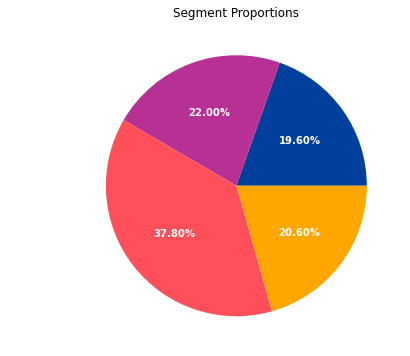

In [20]:
plt.figure(figsize= (9,6))
plt.pie(seg_prop['Segment Proportions'],
      labels = ['Well-Off','Career Focused','Fewer Opportunities','Standard'],
       autopct="%1.2f%%",textprops={'color':"w","fontweight":"bold"},
       colors = ("#003f9c","#b73093","#ff4f5b","#ffa600"))
plt.title("Segment Proportions")

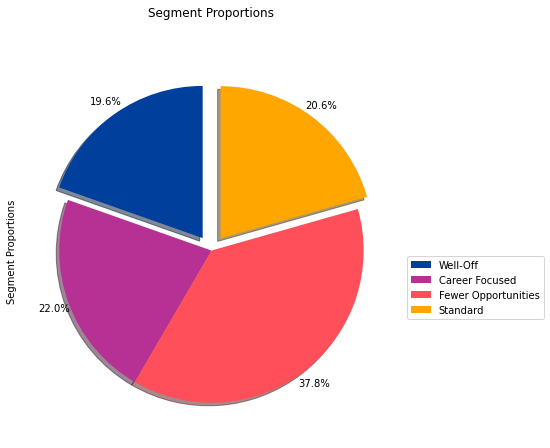

In [21]:
colors_list = ["#003f9c","#b73093","#ff4f5b","#ffa600"]
explode_list = [0.1, 0, 0, 0.1]
seg_prop['Segment Proportions'].plot(kind = 'pie' ,
                           shadow = 'True',
                            autopct = '%1.1f%%',
                            labels = None,
                            pctdistance = 1.1,
                            colors = colors_list,
                            explode = explode_list,
                            figsize = (10,7),
                            startangle = 90
                           )
plt.legend(labels = ['Well-Off','Career Focused','Fewer Opportunities','Standard'], bbox_to_anchor = (1,0.5))
plt.title('Segment Proportions', y =1.1)
plt.show()

### Purchase Occasion and Purchase Incidence

In [22]:
segments_mean = purchase_data_describe.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchased,Average Purchases
Segment,,,
0,117.295918,34.602041,0.284478
1,123.454545,39.827273,0.283102
2,113.730159,22.756614,0.201588
3,117.699029,24.902913,0.212773


In [23]:
segments_std = purchase_data_describe.groupby(['Segment']).std()
segments_std

,N_Visits,N_Purchased,Average Purchases
Segment,,,
0,20.716152,25.900579,0.171787
1,44.864656,53.744530,0.200056
2,16.410498,13.815040,0.120335
3,19.039605,16.774464,0.126603


### How often people from different segments Visit the Store?

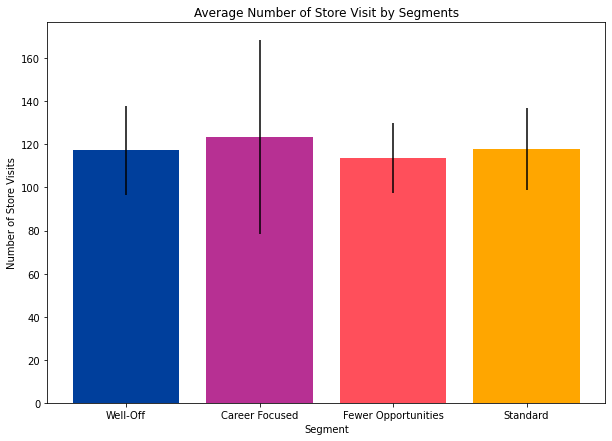

In [24]:
plt.figure(figsize=(10,7))
plt.bar(x = (0,1,2,3),
       tick_label =  ('Well-Off','Career Focused','Fewer Opportunities','Standard'),
       height = segments_mean['N_Visits'],
        yerr = segments_std['N_Visits'],
       color = ("#003f9c","#b73093","#ff4f5b","#ffa600"))
plt.xlabel("Segment")
plt.ylabel("Number of Store Visits")
plt.title("Average Number of Store Visit by Segments")
plt.show()

### How Often a Customer Buys a product?

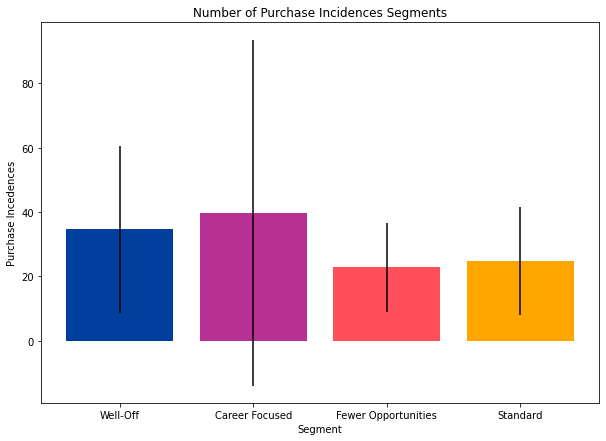

In [25]:
plt.figure(figsize=(10,7))
plt.bar(x = (0,1,2,3),
       tick_label =  ('Well-Off','Career Focused','Fewer Opportunities','Standard'),
       height = segments_mean['N_Purchased'],
        yerr = segments_std['N_Purchased'],
       color = ("#003f9c","#b73093","#ff4f5b","#ffa600"))
plt.xlabel("Segment")
plt.ylabel("Purchase Incedences")
plt.title("Number of Purchase Incidences Segments")
plt.show()

### What is the Average Purchase of each Segment?

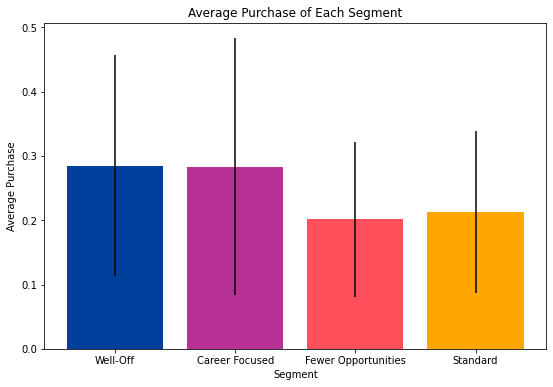

In [26]:
plt.figure(figsize=(9,6))
plt.bar(x = (0,1,2,3),
       tick_label =  ('Well-Off','Career Focused','Fewer Opportunities','Standard'),
       height = segments_mean['Average Purchases'],
        yerr = segments_std['Average Purchases'],
       color = ("#003f9c","#b73093","#ff4f5b","#ffa600"))
plt.xlabel("Segment")
plt.ylabel("Average Purchase")
plt.title("Average Purchase of Each Segment")
plt.show()

### Brand Choice

In [27]:
data_purchase_incidence = data_purchase_predictors[data_purchase_predictors['Incidence'] == 1]

In [28]:
brand_dummies = pd.get_dummies(data_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep='_')
brand_dummies['Segment'], brand_dummies['ID'] = data_purchase_incidence['Segment'], data_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,2,200000500
58648,1,0,0,0,0,2,200000500
58674,0,1,0,0,0,2,200000500
58687,0,1,0,0,0,2,200000500


In [29]:
temp = brand_dummies.groupby(['ID'], as_index = True).mean()
temp

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment
ID,,,,,,
200000001,0.111111,0.444444,0.000000,0.222222,0.222222,2
200000002,0.000000,0.090909,0.000000,0.909091,0.000000,0
200000003,0.000000,0.800000,0.000000,0.000000,0.200000,2
200000004,0.000000,0.090909,0.000000,0.000000,0.909091,2
200000005,0.000000,0.000000,0.000000,0.000000,1.000000,1
...,...,...,...,...,...,...
200000496,0.050000,0.700000,0.000000,0.050000,0.200000,3
200000497,0.023256,0.651163,0.000000,0.302326,0.023256,2
200000498,0.128205,0.589744,0.282051,0.000000,0.000000,3


In [30]:
mean_brand_choice = temp.groupby(['Segment'], as_index = True).mean()
mean_brand_choice

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Segment,,,,,
0,0.041928,0.117422,0.030610,0.613623,0.196417
1,0.072871,0.146808,0.039976,0.112395,0.627951
2,0.137567,0.681190,0.020923,0.061548,0.098772
3,0.251186,0.396502,0.156481,0.059474,0.136357


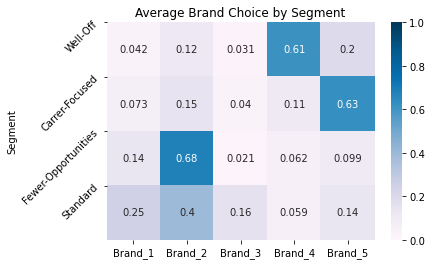

In [31]:
sns.heatmap(mean_brand_choice,
           vmin = 0,
           vmax = 1,
           cmap = 'PuBu',
           annot=True)
plt.yticks([0,1,2,3],['Well-Off','Carrer-Focused','Fewer-Opportunities','Standard'], rotation = 45,fontsize = 10)
plt.title("Average Brand Choice by Segment")
plt.show()

### Revenue
### Revenue = Price * Quantity
#### We will Calculate revenue of Each brand and in total by Segment

In [32]:
temp = data_purchase_predictors[data_purchase_predictors['Brand'] == 1]
temp.loc[:,'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
#Only one brand is brought at Transaction Time
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment','Revenue Brand 1']] = temp[['Segment','Revenue Brand 1']].groupby(['Segment'], as_index= False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1
0,0,699.47
1,1,736.09
2,2,2258.90
3,3,2611.19


In [33]:
temp = data_purchase_predictors[data_purchase_predictors['Brand'] == 2]
temp.loc[:,'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 2']] = temp[['Segment','Revenue Brand 2']].groupby(['Segment'], as_index= False).sum()

In [34]:
temp = data_purchase_predictors[data_purchase_predictors['Brand'] == 3]
temp.loc[:,'Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 3']] = temp[['Segment','Revenue Brand 3']].groupby(['Segment'], as_index= False).sum()

In [35]:
temp = data_purchase_predictors[data_purchase_predictors['Brand'] == 4]
temp.loc[:,'Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 4']] = temp[['Segment','Revenue Brand 4']].groupby(['Segment'], as_index= False).sum()

In [36]:
temp = data_purchase_predictors[data_purchase_predictors['Brand'] == 5]
temp.loc[:,'Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 5']] = temp[['Segment','Revenue Brand 5']].groupby(['Segment'], as_index= False).sum()

In [37]:
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5
0,0,699.47,1298.23,731.35,14185.57,5509.69
1,1,736.09,1746.42,664.75,2363.84,19441.06
2,2,2258.90,13955.14,716.25,1629.31,2230.50
3,3,2611.19,4768.52,3909.17,861.38,2439.75


In [38]:
segments_brand_revenue['Total Revenue'] = segments_brand_revenue.iloc[:,1:6].sum(axis = 1)
segments_brand_revenue['Segment Proportions'] = seg_prop['Segment Proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:"Well-Off",1:"Career-Focused",2:"Fewer-Opportunities",3:"Standard"})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
Fewer-Opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206


In [39]:
segments_brand_revenue_final = segments_brand_revenue.copy()
segments_brand_revenue_final.loc['Brand Wise Revenue'] = segments_brand_revenue.iloc[:,0:7].sum()
segments_brand_revenue_final

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
Fewer-Opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Brand Wise Revenue,6305.65,21768.31,6021.52,19040.10,29621.00,82756.58,1.000


 ### Our findings from Above Data.
1. Career Focused Segment brings the Highest Revenue
2. Standard brings lowest revenue
3. Career Focused is Second Largest Segment still bring Highest Revenue (They buy Costliest Candy in the Store)
4. Well-off Segment is the smallest segment but still brings as same as Career Focused
5. Lowest revenue is from Brand 3 , Most of the income comes from Segment 3 (if price is reduced for Brand 3 Segment 3 Could pivot towards it)
6. Well-Off brand seem to be buying from both Brand 4 and Brand 5. Brand 4 could increase the price